In [ ]:
# 모듈 불러오기
import matplotlib.pyplot as plt
import numpy as np
import requests

In [ ]:
# 데이터 준비
# 하이퍼링크 그래프 다운로드 받기
# example_index: 노드 정보
# example_arc: 에지 정보
# http://webdatacommons.org/hyperlinkgraph

with open("example_index", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
  f.write(r.content)

with open("example_arcs", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
  f.write(r.content)

# 하이퍼링크 그래프 불러오기
nodes = np.loadtxt("example_index", dtype=object)[:,0]
num_nodes = nodes.shape[0]

edges = np.loadtxt("example_arcs", dtype=int)
num_edges = edges.shape[0]

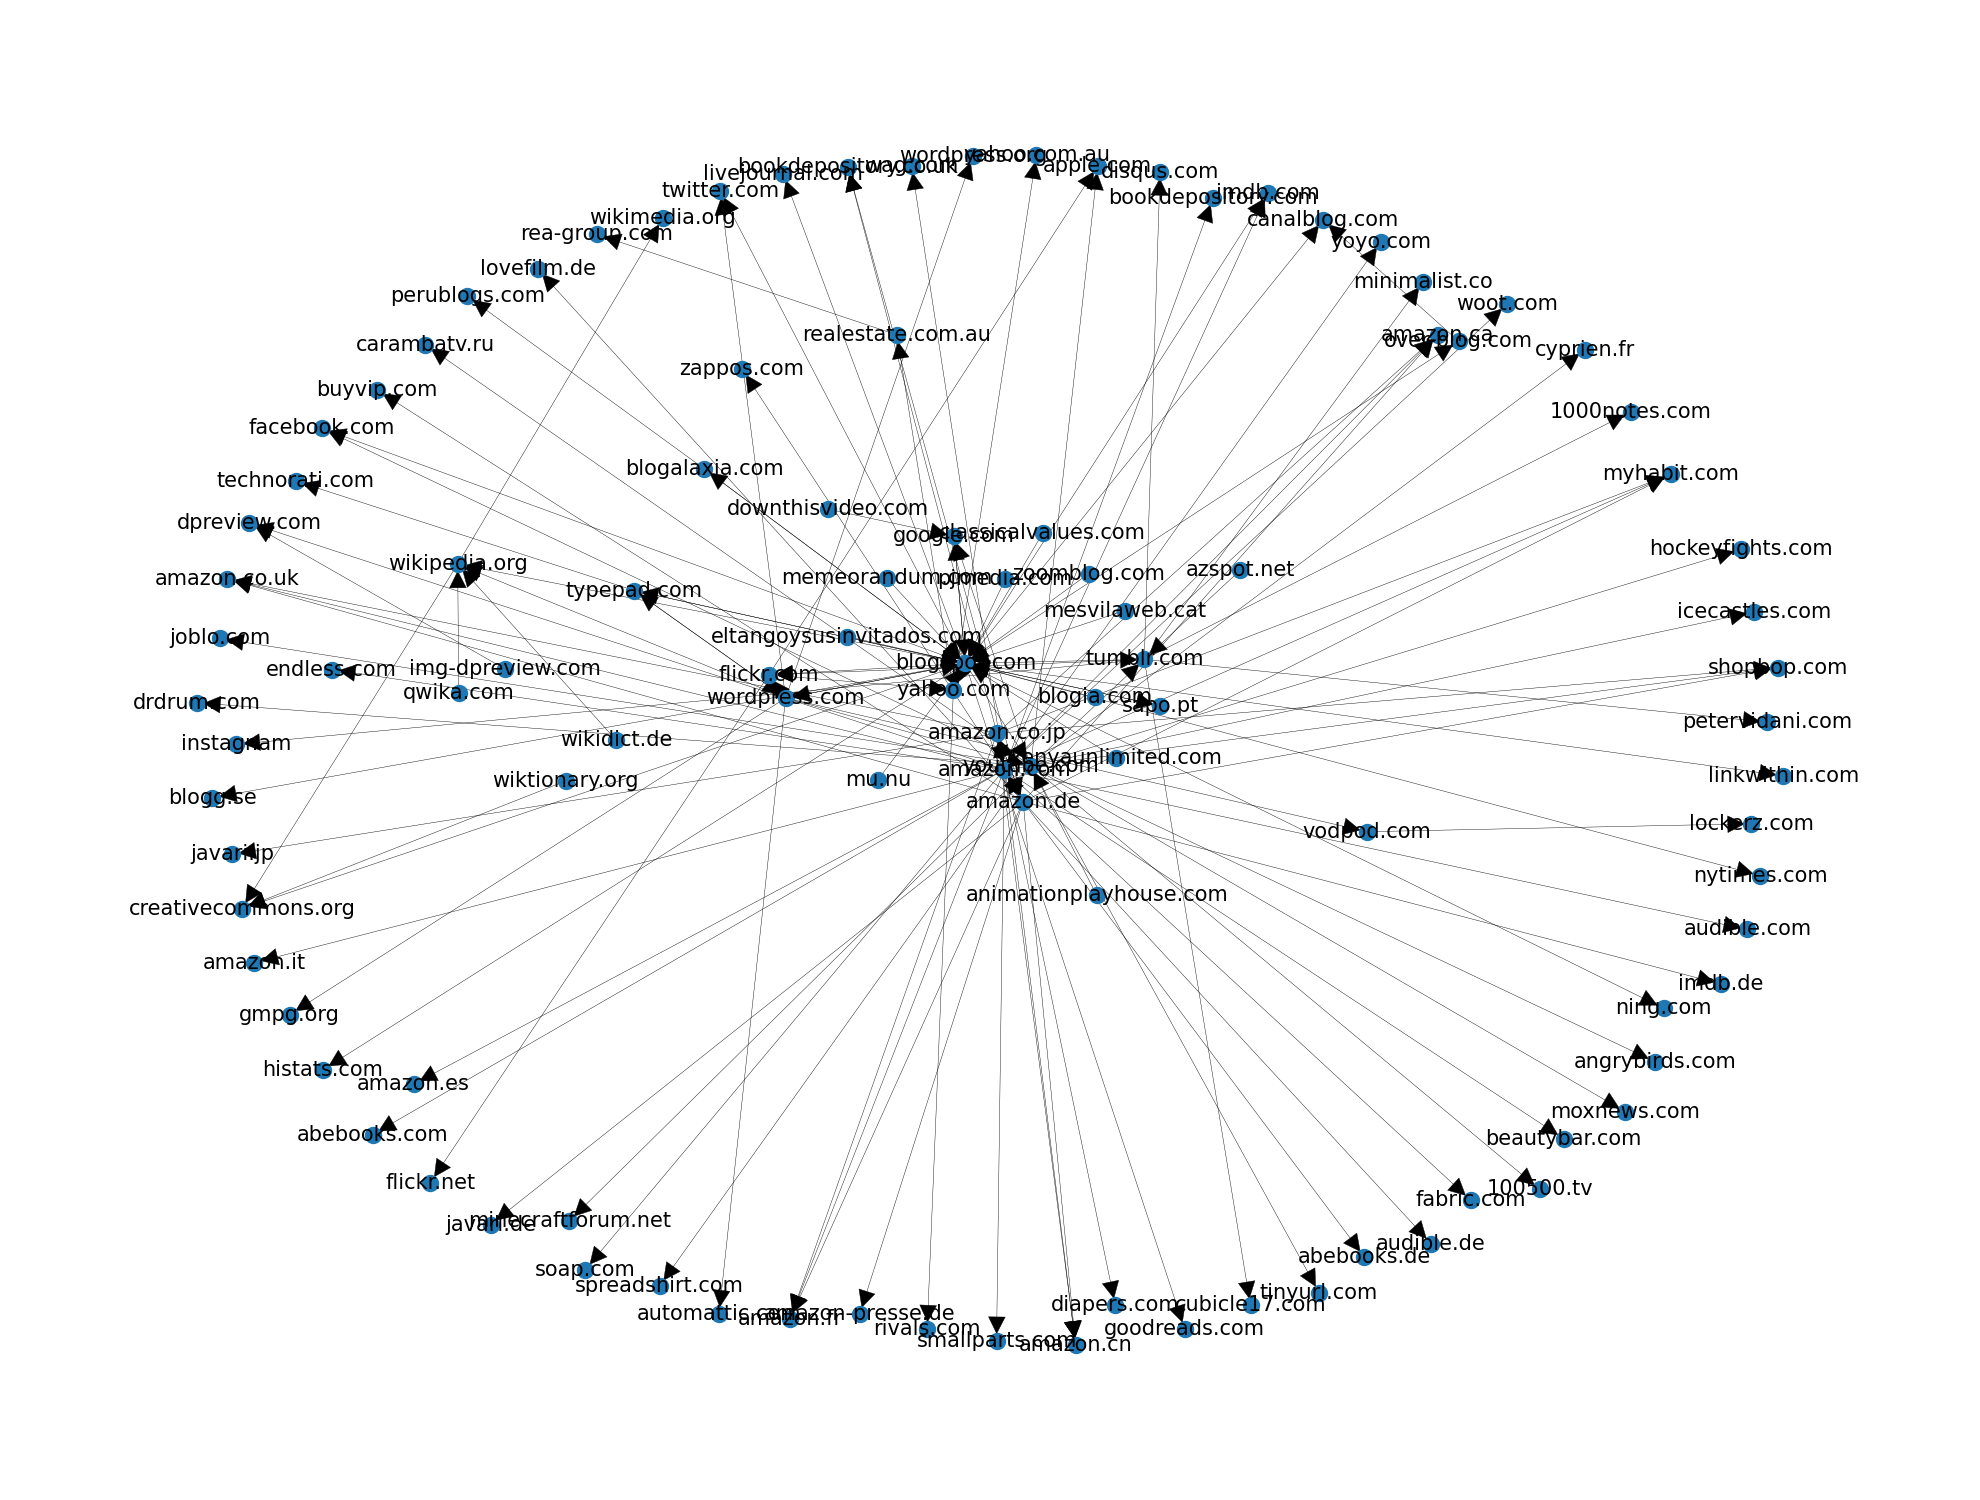

In [ ]:
# 데이터 살펴보기
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(dpi=300)
G = nx.DiGraph()

for e in edges:
  G.add_edge(nodes[e[0]], nodes[e[1]])

pos = nx.spring_layout(G, k =1 , iterations = 200)
nx.draw(G, pos, with_labels = True, node_size = 10, font_size = 5, width = 0.1)

In [ ]:
# PageRank in NetworkX
r = nx.pagerank(G, 0.85)

for pair in sorted(r.items(), key=lambda x: -x[1])[:10]:
  print(pair)

('blogspot.com', 0.08542425762544206)
('creativecommons.org', 0.024220103814991234)
('wikipedia.org', 0.021582586522641486)
('canalblog.com', 0.017730661911958275)
('youtube.com', 0.016119265401656313)
('tumblr.com', 0.015904254686443048)
('google.com', 0.015904254686443048)
('wikimedia.org', 0.015599528017970031)
('rea-group.com', 0.015057970139281873)
('yahoo.com', 0.013150763969634)


In [ ]:
# Google Matrix는 Dense 함
# -> 연산이 과도하게 많음
# 보다 효율적인 구현 방법
# 각 에지마다, 시작 노드의 점수를 끝 노드 점수에 합산
def pagerank(edges, n_nodes, beta=0.85, epoch=100):

  r = [1/n_nodes] * n_nodes

  d = [0] * n_nodes
  for u, _ in edges:
    d[u] += 1

  teleport = (1-beta) / n_nodes

  for _ in range(epoch):

    r_next = [teleport] * n_nodes
    for u, v in edges:
      r_next[v] += beta * r[u] / d[u]

    r_sum = sum(r_next)
    for u in range(n_nodes):
      r_next[u] += (1-r_sum) / n_nodes

    r = r_next

  return r

In [ ]:
# 계산 및 출력
n_nodes = len(nodes)
r = pagerank(edges, n_nodes)
for score, node in sorted(zip(r, nodes), reverse = True)[:10]:
  print(f"({score:.6f}) {node}")

(0.085426) blogspot.com
(0.024220) creativecommons.org
(0.021582) wikipedia.org
(0.017731) canalblog.com
(0.016119) youtube.com
(0.015904) tumblr.com
(0.015904) google.com
(0.015600) wikimedia.org
(0.015058) rea-group.com
(0.013151) yahoo.com
